# **Part 1: Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization, Conv2D, Conv2DTranspose, Dropout
from tensorflow.keras.optimizers import Adam

Load the Datasets

In [ ]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = fashion_mnist.load_data()

Preview the Datasets

In [ ]:
def plot_samples(images, labels, title, class_labels):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    fig.suptitle(title, fontsize=14)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"{class_labels[labels[i]]}")
        ax.axis('off')
    plt.show()

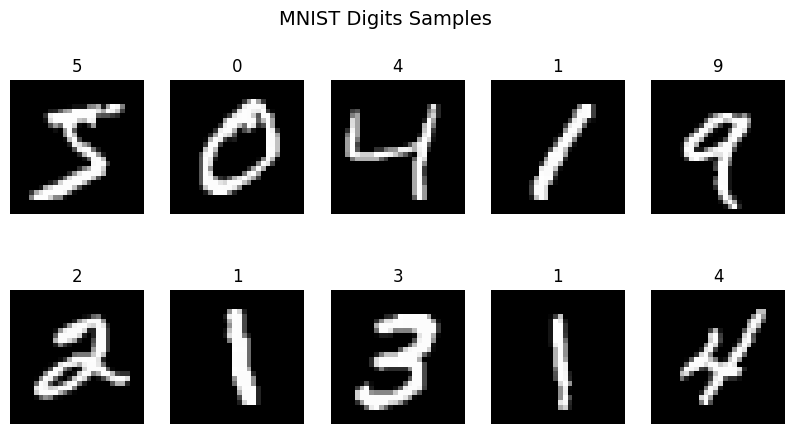

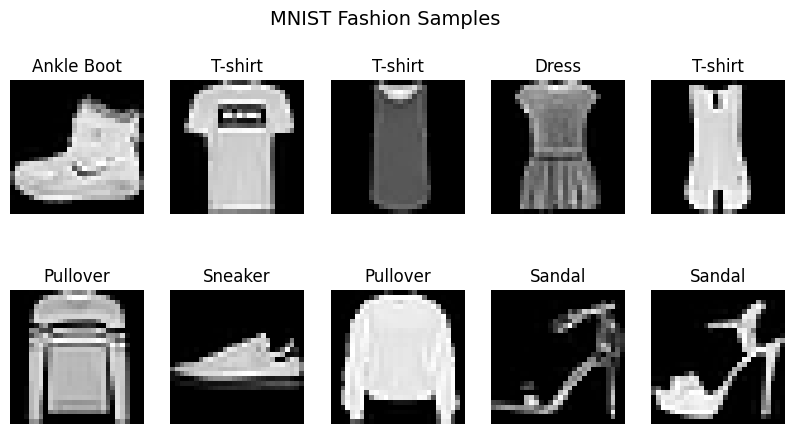

In [ ]:
mnist_labels = [str(i) for i in range(10)]
fashion_labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Plot sample images
plot_samples(x_train_mnist, y_train_mnist, "MNIST Digits Samples", mnist_labels)
plot_samples(x_train_fashion, y_train_fashion, "MNIST Fashion Samples", fashion_labels)

Dataset Analysis

In [ ]:
print("MNIST Digits:")
print(f"Training samples: {x_train_mnist.shape[0]}, Testing samples: {x_test_mnist.shape[0]}")
print(f"Image dimensions: {x_train_mnist.shape[1:]}\n")

print("MNIST Fashion:")
print(f"Training samples: {x_train_fashion.shape[0]}, Testing samples: {x_test_fashion.shape[0]}")
print(f"Image dimensions: {x_train_fashion.shape[1:]}\n")

MNIST Digits:
Training samples: 60000, Testing samples: 10000
Image dimensions: (28, 28)

MNIST Fashion:
Training samples: 60000, Testing samples: 10000
Image dimensions: (28, 28)



In [ ]:
unique_mnist, counts_mnist = np.unique(y_train_mnist, return_counts=True)
unique_fashion, counts_fashion = np.unique(y_train_fashion, return_counts=True)

print("Class distribution in MNIST Digits:")
for label, count in zip(unique_mnist, counts_mnist):
    print(f"Digit {label}: {count} samples")

print("\nClass distribution in MNIST Fashion:")
for label, count in zip(unique_fashion, counts_fashion):
    print(f"{fashion_labels[label]}: {count} samples")

Class distribution in MNIST Digits:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples

Class distribution in MNIST Fashion:
T-shirt: 6000 samples
Trouser: 6000 samples
Pullover: 6000 samples
Dress: 6000 samples
Coat: 6000 samples
Sandal: 6000 samples
Shirt: 6000 samples
Sneaker: 6000 samples
Bag: 6000 samples
Ankle Boot: 6000 samples


# **Part 2: Implementing Generative Adversarial Networks (GANs)**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
(x_train_digits, y_train_digits), (x_test_digits, y_test_digits) = tf.keras.datasets.mnist.load_data()
(x_train_fashion, y_train_fashion), (x_test_fashion, y_test_fashion) = tf.keras.datasets.fashion_mnist.load_data()

Normalize datasets

In [ ]:
x_train_digits = (x_train_digits / 255.0).astype(np.float32)
x_train_fashion = (x_train_fashion / 255.0).astype(np.float32)

In [ ]:
# Define class labels for both datasets
digit_labels = [str(i) for i in range(10)]
fashion_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Select shoe images from Fashion-MNIST
shoe_indices = np.where(y_train_fashion == 9)[0]
x_train_shoes = x_train_fashion[shoe_indices]

# Convert data to PyTorch tensors
x_train_digits_tensor = torch.tensor(x_train_digits).unsqueeze(1)
x_train_shoes_tensor = torch.tensor(x_train_shoes).unsqueeze(1)

GAN Generator

In [ ]:
def define_generator():
    return nn.Sequential(
        nn.Linear(100, 256),
        nn.ReLU(),
        nn.Linear(256, 512),
        nn.ReLU(),
        nn.Linear(512, 784),
        nn.Tanh()
    )

In [ ]:
def define_discriminator():
    return nn.Sequential(
        nn.Linear(784, 512),
        nn.ReLU(),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Linear(256, 1),
        nn.Sigmoid()
    )

Training the GAN

Epoch [1/50], D Loss: 0.43277889490127563, G Loss: 3.3119547367095947
Epoch [2/50], D Loss: 0.15142522752285004, G Loss: 4.135130405426025
Epoch [3/50], D Loss: 0.0960894227027893, G Loss: 4.944693088531494
Epoch [4/50], D Loss: 0.12473856657743454, G Loss: 5.100174427032471
Epoch [5/50], D Loss: 0.018755972385406494, G Loss: 6.9681596755981445
Epoch [6/50], D Loss: 0.041567202657461166, G Loss: 6.084621906280518
Epoch [7/50], D Loss: 0.1325703114271164, G Loss: 5.764816761016846
Epoch [8/50], D Loss: 0.09134860336780548, G Loss: 8.103727340698242
Epoch [9/50], D Loss: 0.1060720682144165, G Loss: 5.873146057128906
Epoch [10/50], D Loss: 0.05060292407870293, G Loss: 6.60807991027832
Epoch [11/50], D Loss: 0.038478098809719086, G Loss: 6.529876232147217
Epoch [12/50], D Loss: 0.20865479111671448, G Loss: 5.9854583740234375
Epoch [13/50], D Loss: 0.4134376049041748, G Loss: 5.924057483673096
Epoch [14/50], D Loss: 0.13462474942207336, G Loss: 6.23283576965332
Epoch [15/50], D Loss: 0.0414

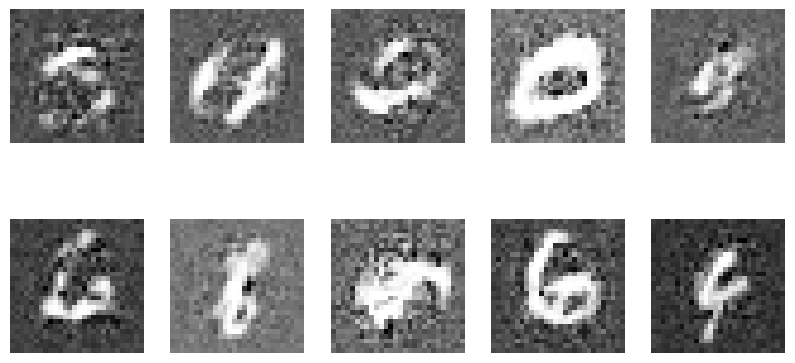

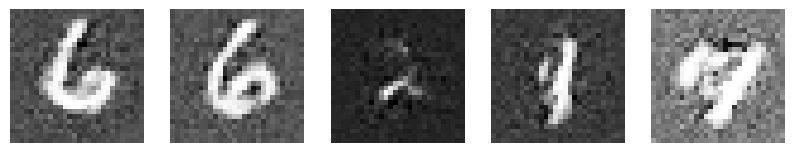

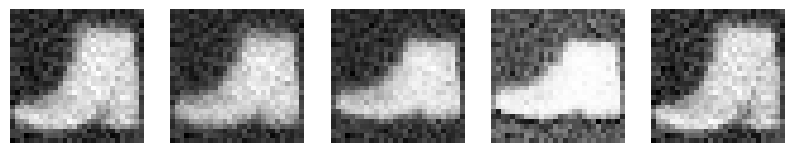

In [ ]:
def train_gan(generator, discriminator, data, epochs=50, batch_size=64, learning_rate=0.0002):
    criterion = nn.BCELoss()
    optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
    optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

    dataloader = DataLoader(TensorDataset(data), batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        for real_data in dataloader:
            real_data = real_data[0].view(-1, 784)
            batch_size = real_data.size(0)

            # Train Discriminator
            real_labels = torch.ones(batch_size, 1)
            fake_labels = torch.zeros(batch_size, 1)

            optimizer_d.zero_grad()
            real_loss = criterion(discriminator(real_data), real_labels)

            noise = torch.randn(batch_size, 100)
            fake_data = generator(noise)
            fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)

            d_loss = real_loss + fake_loss
            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()
            g_loss = criterion(discriminator(fake_data), real_labels)
            g_loss.backward()
            optimizer_g.step()

        print(f"Epoch [{epoch+1}/{epochs}], D Loss: {d_loss.item()}, G Loss: {g_loss.item()}")

# Initialize and train GAN for digits and shoes
generator_digits = define_generator()
discriminator_digits = define_discriminator()
train_gan(generator_digits, discriminator_digits, x_train_digits_tensor)

generator_shoes = define_generator()
discriminator_shoes = define_discriminator()
train_gan(generator_shoes, discriminator_shoes, x_train_shoes_tensor)

# Generate and display images
def generate_images(generator, num_images=10, specific_digit=None, dataset='digits'):
    noise = torch.randn(num_images, 100)
    generated_images = generator(noise).detach().numpy().reshape(-1, 28, 28)

    plt.figure(figsize=(10,5))
    for i in range(num_images):
        plt.subplot(2, 5, i+1)
        plt.imshow(generated_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Display generated images
generate_images(generator_digits, 10)  # 10 random generated digits
generate_images(generator_digits, 5, specific_digit=6)  # 5 images of digit '6'
generate_images(generator_shoes, 5, dataset='fashion')  # 5 generated shoes

Generating Images

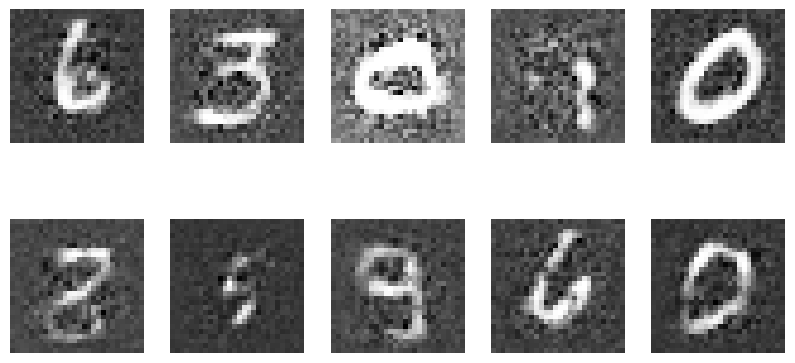

In [ ]:
generate_images(generator_digits, 10)  # 10 random generated digits

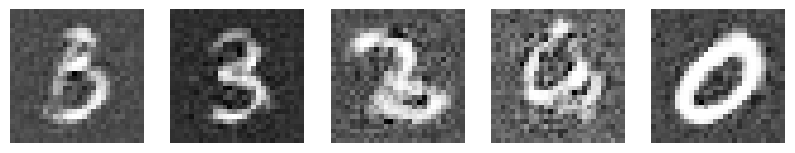

In [ ]:
generate_images(generator_digits, 5, specific_digit=6)  # 5 images of digit '6'

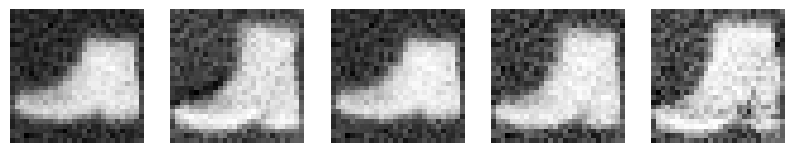

In [ ]:
generate_images(generator_shoes, 5, dataset='fashion')  # 5 generated shoes

# **Part 3: Implementing Variational Autoencoder (VAE)**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
# Define the VAE model
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()

        # Encoder: Conv2d -> ReLU
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),  # 28x28 -> 14x14
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2, padding=1),  # 14x14 -> 7x7
            nn.ReLU(),
            nn.Flatten()
        )

        self.fc_mu = nn.Linear(7 * 7 * 64, latent_dim)
        self.fc_logvar = nn.Linear(7 * 7 * 64, latent_dim)

        # Decoder: ConvTranspose2d -> ReLU
        self.fc_decode = nn.Linear(latent_dim, 7 * 7 * 64)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),  # 7x7 -> 14x14
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),  # 14x14 -> 28x28
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)  # Compute standard deviation
        eps = torch.randn_like(std)  # Random noise
        return mu + eps * std  # Reparameterization trick

    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.fc_decode(z).view(-1, 64, 7, 7)
        x_reconstructed = self.decoder(x_reconstructed)
        return x_reconstructed, mu, logvar

# Define loss function (BCE + KL Divergence)
def vae_loss(x_reconstructed, x, mu, logvar):
    recon_loss = F.binary_cross_entropy(x_reconstructed, x, reduction="sum")
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())  # KL divergence
    return recon_loss + kl_div

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=128, shuffle=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.15MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 131kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 247kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.02MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Train VAE
vae = VAE(latent_dim=20)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

epochs = 20
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch, (x, _) in enumerate(train_loader):
        optimizer.zero_grad()
        x_reconstructed, mu, logvar = vae(x)
        loss = vae_loss(x_reconstructed, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss / len(train_loader.dataset):.4f}")

Epoch [1/20], Loss: 155.0879
Epoch [2/20], Loss: 114.3210
Epoch [3/20], Loss: 109.8037
Epoch [4/20], Loss: 107.5886
Epoch [5/20], Loss: 106.2520
Epoch [6/20], Loss: 105.3871
Epoch [7/20], Loss: 104.7470
Epoch [8/20], Loss: 104.1586
Epoch [9/20], Loss: 103.6669
Epoch [10/20], Loss: 103.3205
Epoch [11/20], Loss: 102.9302
Epoch [12/20], Loss: 102.6732
Epoch [13/20], Loss: 102.4127
Epoch [14/20], Loss: 102.1429
Epoch [15/20], Loss: 101.8813
Epoch [16/20], Loss: 101.7332
Epoch [17/20], Loss: 101.5264
Epoch [18/20], Loss: 101.3000
Epoch [19/20], Loss: 101.1687
Epoch [20/20], Loss: 101.0271


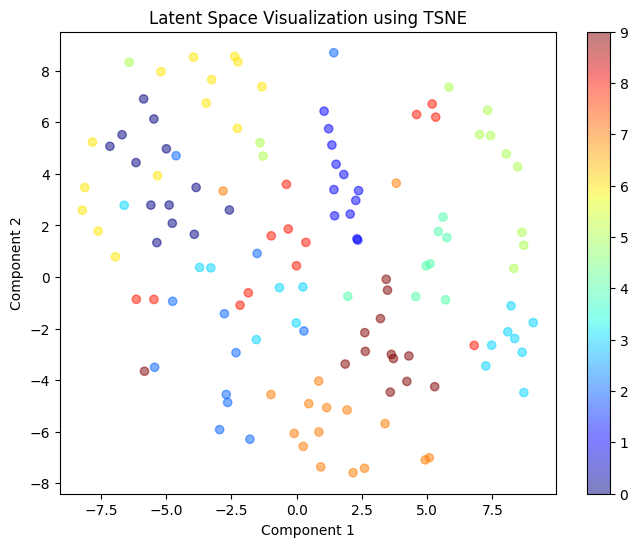

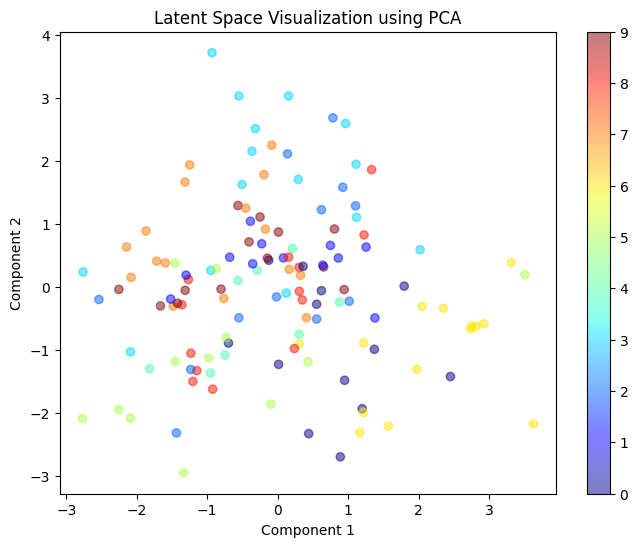

In [ ]:
# Extract and visualize latent space
vae.eval()
with torch.no_grad():
    data, labels = next(iter(train_loader))
    _, mu, _ = vae(data)
    mu = mu.numpy()

# t-SNE & PCA Visualization
def visualize_latent_space(latent_vectors, labels, method="tsne"):
    if method == "pca":
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)

    latent_2d = reducer.fit_transform(latent_vectors)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=labels[:latent_2d.shape[0]], cmap="jet", alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f"Latent Space Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

visualize_latent_space(mu, labels.numpy(), method="tsne")
visualize_latent_space(mu, labels.numpy(), method="pca")

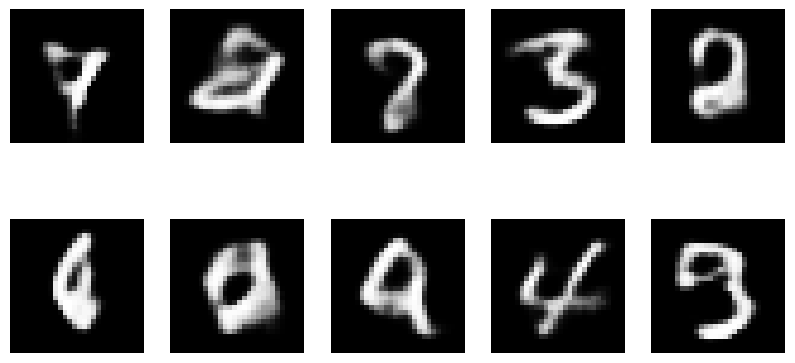

In [ ]:
# Generate new images
def generate_new_images(vae, num_images=10):
    with torch.no_grad():
        z = torch.randn(num_images, 20)  # Sample from standard normal distribution
        reconstructed = vae.decoder(vae.fc_decode(z).view(-1, 64, 7, 7)).cpu()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(reconstructed[i][0], cmap='gray')
        plt.axis('off')
    plt.show()

generate_new_images(vae, num_images=10)

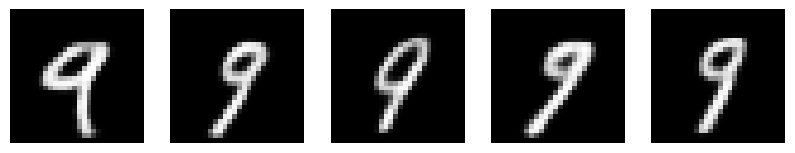

In [ ]:
# Generate images of digit '9'
def generate_specific_digit(vae, digit=9, num_images=5):
    with torch.no_grad():
        indices = (mnist_train.targets == digit).nonzero(as_tuple=True)[0]
        x_selected = mnist_train.data[indices][:num_images].float() / 255.0
        x_selected = x_selected.unsqueeze(1)
        _, mu, _ = vae(x_selected)
        reconstructed = vae.decoder(vae.fc_decode(mu).view(-1, 64, 7, 7)).cpu()

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, 5, i + 1)
        plt.imshow(reconstructed[i][0], cmap='gray')
        plt.axis('off')
    plt.show()

generate_specific_digit(vae, digit=9, num_images=5)

Epoch [1/20], Loss: 268.3399
Epoch [2/20], Loss: 252.0037
Epoch [3/20], Loss: 248.7344
Epoch [4/20], Loss: 246.6753
Epoch [5/20], Loss: 245.2644
Epoch [6/20], Loss: 244.2551
Epoch [7/20], Loss: 243.4764
Epoch [8/20], Loss: 242.8543
Epoch [9/20], Loss: 242.3362
Epoch [10/20], Loss: 241.8823
Epoch [11/20], Loss: 241.5058
Epoch [12/20], Loss: 241.2011
Epoch [13/20], Loss: 240.9081
Epoch [14/20], Loss: 240.6667
Epoch [15/20], Loss: 240.4493
Epoch [16/20], Loss: 240.2566
Epoch [17/20], Loss: 240.0916
Epoch [18/20], Loss: 239.9124
Epoch [19/20], Loss: 239.7979
Epoch [20/20], Loss: 239.6456


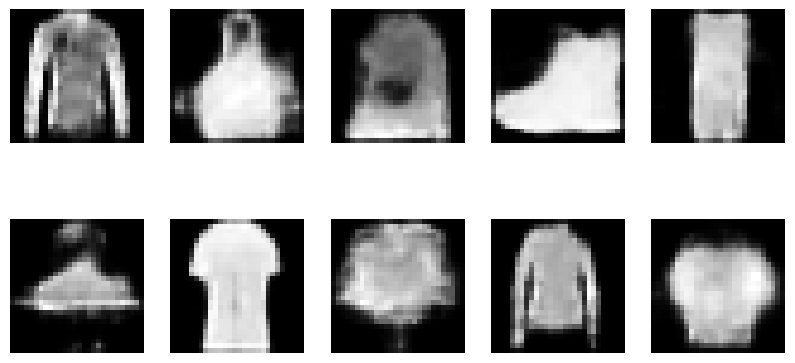

In [ ]:
# Generate FashionMNIST shoes
fashion_mnist = torchvision.datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
fashion_loader = torch.utils.data.DataLoader(fashion_mnist, batch_size=128, shuffle=True)

vae.train()
for epoch in range(20):
    total_loss = 0
    for batch, (x, _) in enumerate(fashion_loader):
        optimizer.zero_grad()
        x_reconstructed, mu, logvar = vae(x)
        loss = vae_loss(x_reconstructed, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/20], Loss: {total_loss / len(fashion_loader.dataset):.4f}")

generate_new_images(vae, num_images=10)

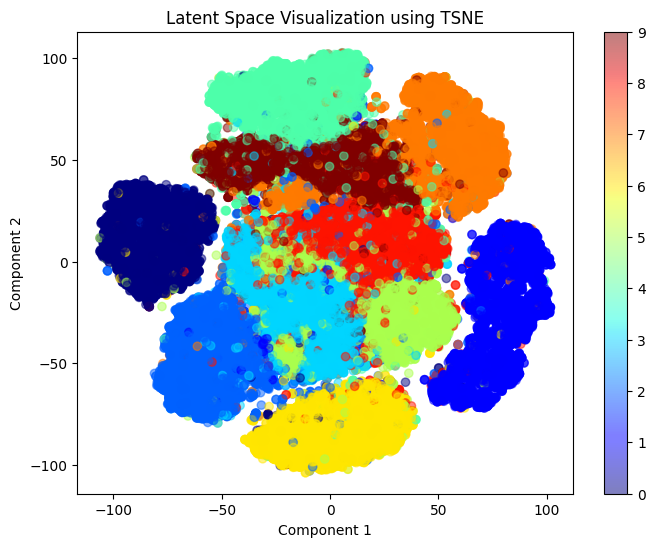

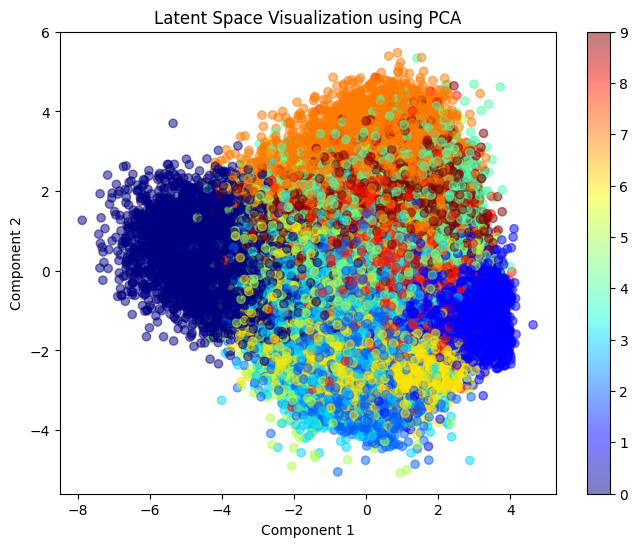

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Function to extract and visualize latent space
def visualize_latent_space(vae, dataloader, method="tsne"):
    vae.eval()
    all_mu = []
    all_labels = []

    with torch.no_grad():
        for x, labels in dataloader:
            _, mu, _ = vae(x)
            all_mu.append(mu)
            all_labels.append(labels)

    all_mu = torch.cat(all_mu).cpu().numpy()
    all_labels = torch.cat(all_labels).cpu().numpy()

    if method == "pca":
        reducer = PCA(n_components=2)
    else:
        reducer = TSNE(n_components=2, perplexity=30, random_state=42)

    latent_2d = reducer.fit_transform(all_mu)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(latent_2d[:, 0], latent_2d[:, 1], c=all_labels, cmap="jet", alpha=0.5)
    plt.colorbar(scatter)
    plt.title(f"Latent Space Visualization using {method.upper()}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

# Visualize latent space after MNIST training
visualize_latent_space(vae, train_loader, method="tsne")
visualize_latent_space(vae, train_loader, method="pca")

# **Part 4: Comparison and Analysis**

### *1. Image Quality (Based on Observations)*  
- *GAN:* The generated images appear blurry, which may indicate *training instability, mode collapse, or an imbalance between the generator and discriminator.*  
- *VAE:* The outputs are notably clearer, suggesting that the *encoder-decoder architecture is effectively capturing important features and reconstructing them well.*  
- *Conclusion:* In this case, *VAE produces more visually coherent images,* though typically, GANs are expected to generate sharper outputs.  

### *2. Possible Reasons for GAN’s Poor Performance*  
If the GAN images are blurry, the following factors could be contributing:  
- *Weak generator:* The network might not be complex enough. *Adding more convolutional layers* could enhance feature learning.  
- *Discriminator imbalance:* If the discriminator is too weak, it fails to guide the generator properly; if it’s too strong, the generator struggles to improve. *Adjusting learning rates for both networks* might help.  
- *Mode collapse:* If the GAN produces repetitive or low-diversity images, it may be stuck in a local optimum. *Techniques like adding noise or using WGAN-GP* could improve training stability.  

### *3. Why is VAE Performing Better?*  
The clearer VAE images suggest:  
- *A well-structured latent space:* The latent vector effectively encodes meaningful information, leading to *better reconstructions.*  
- *Sufficient decoder capacity:* The decoder seems capable of *accurately reconstructing fine details.*  
- *Proper KL-divergence balance:* The *β-VAE approach might be helping regulate the trade-off between reconstruction quality and latent space regularization.*  

### *Possible Improvements & Next Steps*  
- Increase *GAN generator depth* by adding layers to improve detail generation.  
- Tune *learning rates* for both generator and discriminator.  
- Experiment with *a larger latent space for VAE* to see if even better reconstructions can be achieved.  
- Test different *loss functions or architectural tweaks* for both models.  

# **Part 5: Save world with VAE**

# **Fraud Detection**

Preprocessing the Data

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load dataset
df = pd.read_csv("/content/creditcard (1).csv")

# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Split into normal and fraud
normal_data = df[df['Class'] == 0].drop(columns=['Class']).values
fraud_data = df[df['Class'] == 1].drop(columns=['Class']).values

# Convert to PyTorch tensors
normal_tensor = torch.tensor(normal_data, dtype=torch.float32)
fraud_tensor = torch.tensor(fraud_data, dtype=torch.float32)

Define VAE Model

In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)
        self.decoder_fc = nn.Linear(latent_dim, 32)
        self.decoder = nn.Sequential(
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = self.encoder(x)
        mu, logvar = self.fc_mu(x), self.fc_logvar(x)
        z = self.reparameterize(mu, logvar)
        x = self.decoder_fc(z)
        x = self.decoder(x)
        return x, mu, logvar

Define VAE Loss Function

In [ ]:
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div

Train the VAE on Normal Transactions

In [ ]:
# Training settings
batch_size = 128
epochs = 30
learning_rate = 0.001

train_loader = DataLoader(TensorDataset(normal_tensor), batch_size=batch_size, shuffle=True)
vae = VAE(input_dim=normal_tensor.shape[1])
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

# Training loop
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in train_loader:
        data = batch[0]
        optimizer.zero_grad()
        recon_data, mu, logvar = vae(data)
        loss = vae_loss(recon_data, data, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")

Epoch 1, Loss: 3190.7480297483485
Epoch 2, Loss: 2583.466899264084
Epoch 3, Loss: 2408.04196342791
Epoch 4, Loss: 2312.8181075981133
Epoch 5, Loss: 2268.602525987462
Epoch 6, Loss: 2240.0123960699293
Epoch 7, Loss: 2215.766017251139
Epoch 8, Loss: 2203.8662487891856
Epoch 9, Loss: 2184.1890670954913
Epoch 10, Loss: 2164.164687492309
Epoch 11, Loss: 2151.49365119007
Epoch 12, Loss: 2142.7010011303864
Epoch 13, Loss: 2128.916608341742
Epoch 14, Loss: 2126.003720727297
Epoch 15, Loss: 2112.146496131547
Epoch 16, Loss: 2104.3460115695407
Epoch 17, Loss: 2096.7026475413654
Epoch 18, Loss: 2093.3079195340188
Epoch 19, Loss: 2089.9852290938934
Epoch 20, Loss: 2083.551584348498
Epoch 21, Loss: 2080.0145621312618
Epoch 22, Loss: 2071.443874671586
Epoch 23, Loss: 2071.914058036358
Epoch 24, Loss: 2066.138869442669
Epoch 25, Loss: 2061.6357417068
Epoch 26, Loss: 2059.1610043420114
Epoch 27, Loss: 2055.3117075043688
Epoch 28, Loss: 2050.802827108883
Epoch 29, Loss: 2047.3796221907346
Epoch 30, Los

Anomaly Detection – Flagging Fraudulent Transactions

In [ ]:
vae.eval()
with torch.no_grad():
    fraud_recon, _, _ = vae(fraud_tensor)
    fraud_loss = torch.mean((fraud_recon - fraud_tensor) ** 2, dim=1)

    normal_recon, _, _ = vae(normal_tensor)
    normal_loss = torch.mean((normal_recon - normal_tensor) ** 2, dim=1)

# Set threshold as 95th percentile of normal transactions
threshold = np.percentile(normal_loss.numpy(), 95)

# Flag anomalies
anomalies = fraud_loss.numpy() > threshold

print(f"Detected Fraudulent Transactions: {np.sum(anomalies)}/{len(fraud_data)}")

Detected Fraudulent Transactions: 388/492
